In [1]:
%pylab inline
from parcels import FieldSet, Field, ParticleSet, JITParticle, AdvectionRK4, ErrorCode, Variable
import cartopy
from glob import glob
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import xarray as xr
from netCDF4 import Dataset
import math as math
import sys
sys.path.insert(1, '/home/sypmauu/GalapagosProject/scripts/functions')
from ParticlePlotFunctions import *
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
# load mean 2008 field data

MITdata = np.load('meanfields2008_MIT.npz')
NEMOdata = np.load('meanfields2008_NEMO.npz')
CMEMSdata = np.load('meanfields2008_CMEMS.npz')

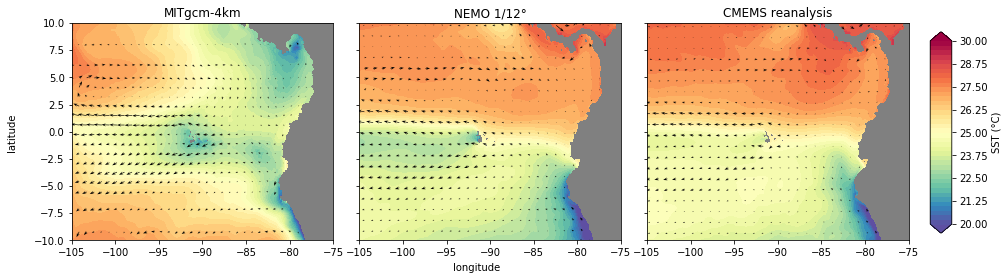

In [22]:
# compare SST and velocity fields, make and save plot

figsize=(15,4)
map_extent = [-105,-75,-10,10]
Tmin=20
Tmax=30
headwidth=5
headlength=7
scale=0.7
levels = np.linspace(Tmin, Tmax, 41)

# figure set-up
fig, axs = plt.subplots(1, 3, figsize=figsize, 
                              sharex = True, 
                              sharey = True)
fig.subplots_adjust(hspace=.5, wspace=.1)
axs = axs.ravel()
fig.text(0.5, 0.03, 'longitude', ha='center', va='center')
fig.text(0.07, 0.5, 'latitude', ha='center', va='center', rotation='vertical')

# fig MITgcm 
lon = MITdata['lon_MIT']
lat = MITdata['lat_MIT']
Tvel = MITdata['Tmean_MIT']
Uvel = MITdata['Umean_MIT']
Vvel = MITdata['Vmean_MIT']
dq = 26

im = axs[0].contourf(lon,lat,Tvel,       
                     levels = levels,    
                     cmap='Spectral_r',       
                     extend='both',      
                     origin='lower')     
axs[0].set_title('MITgcm-4km')          
axs[0].set_xlim(map_extent[0:2])
axs[0].set_ylim(map_extent[2:4])
axs[0].set_facecolor('gray')
  
axs[0].quiver(lon[0::dq],lat[0::dq],
              Uvel[0::dq,0::dq],Vvel[0::dq,0::dq],
              headwidth=headwidth,
              headlength=headlength,
              scale_units='xy',
              angles='xy',
              scale=scale)

# fig NEMO
lon = NEMOdata['lon_NEMO']
lat = NEMOdata['lat_NEMO']
Tvel = NEMOdata['Tmean_NEMO']
Uvel = NEMOdata['Umean_NEMO']
Vvel = NEMOdata['Vmean_NEMO']
Tvel[Tvel==0]=nan
Uvel[Uvel==0]=nan
Vvel[Vvel==0]=nan
dq = 12

im = axs[1].contourf(lon,lat,Tvel,       
                     levels = levels,    
                     cmap='Spectral_r',       
                     extend='both',      
                     origin='lower')     
axs[1].set_title('NEMO 1/12\xb0')          
axs[1].set_xlim(map_extent[0:2])
axs[1].set_ylim(map_extent[2:4])
axs[1].set_facecolor('gray')
  
axs[1].quiver(lon[0::dq,0::dq],lat[0::dq,0::dq],
              Uvel[0::dq,0::dq],Vvel[0::dq,0::dq],
              headwidth=headwidth,
              headlength=headlength,
              scale_units='xy',
              angles='xy',
              scale=scale)

# fig CMEMS
lon = CMEMSdata['lon_CMEMS']
lat = CMEMSdata['lat_CMEMS']
Tvel = CMEMSdata['Tmean_CMEMS']
Uvel = CMEMSdata['Umean_CMEMS']
Vvel = CMEMSdata['Vmean_CMEMS']
dq = 12

im = axs[2].contourf(lon,lat,Tvel,       
                     levels = levels,    
                     cmap='Spectral_r',       
                     extend='both',      
                     origin='lower')     
axs[2].set_title('CMEMS reanalysis')          
axs[2].set_xlim(map_extent[0:2])
axs[2].set_ylim(map_extent[2:4])
axs[2].set_facecolor('gray')
  
axs[2].quiver(lon[0::dq],lat[0::dq],
              Uvel[0::dq,0::dq],Vvel[0::dq,0::dq],
              headwidth=headwidth,
              headlength=headlength,
              scale_units='xy',
              angles='xy',
              scale=scale)

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.set_ylabel('SST (\xb0C)')
plt.savefig('meanfields2008.pdf')

In [ ]:
# plot starting position of particles

bathy_file = '/home/sypmauu/GalapagosProject/data/MIT4km/RGEMS3_Surf_grid.nc'
dfile = Dataset(bathy_file)
bathy = dfile.variables['Depth'][:]
lat = dfile.variables['YG'][:]
lon = dfile.variables['XG'][:]

landmask = bathy[:]
landmask = np.where(landmask<1, 0, landmask)
landmask = np.where(landmask>=1, 1, landmask)
bathy = np.where(bathy<1, nan, bathy)

# load particle data
namefile = '/home/sypma/GalapagosProject/results/data_output/galapagosparticles_bwd_4km_2008.nc'
Traj_MITbwd = ReadTrajectories(namefile)


